# **Student Performance Notebook**

## 1. Data Understanding

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
# Load Data
df = pd.read_csv("/content/StudentsPerformance.csv")

### Basic Info

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df.shape

(1000, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [39]:
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(col,df[col].value_counts()) # counting the values of every catagorical feature using a for loop

gender gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course test preparation course
none         642
completed    358
Name: count, dtype: int64


Insights :

This dataset contains 1000 students with different backgrounds , 8 features (5 categorical, 3 numerical).

Performance target is scores (and their average).

## 2. Data Checks

In [40]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [41]:
df.duplicated().sum()

np.int64(0)

Insights

No Missing Values or Duplicates , Dataset is Clean and Ready

# Data Preprocessing

## 3. Feature Engineering

In [42]:
df_copy = df.copy() # will work in a copy and keep the main dataframe as it is

### One-hot encode for correlations

In [43]:
df_copy = pd.get_dummies(
    df_copy,
    columns=["gender","race/ethnicity","lunch","test preparation course"],
    drop_first=True
)

### Create Label Encoding for education levels

In [44]:
educationOrder = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}
df_copy["parental level of education"] = df["parental level of education"].map(educationOrder)

### Create average score column as a KPI for students scores

In [45]:
df["average_score"] = df[['math score','reading score','writing score']].mean(axis=1)
df_copy["average_score"] = df["average_score"]

In [46]:
def evaluate_performance(student_row):

    math_score = student_row['math score']
    reading_score = student_row['reading score']
    writing_score = student_row['writing score']

    if math_score < 60 or reading_score < 60 or writing_score < 60:
        return "Needs Help"

    average_score = (math_score + reading_score + writing_score) / 3

    if average_score >= 80:
        return "Good Score"

    return "Satisfactory"

df['Performance Category'] = df.apply(evaluate_performance, axis=1)

In [47]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,Performance Category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Satisfactory
1,female,group C,some college,standard,completed,69,90,88,82.333333,Good Score
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Good Score
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Needs Help
4,male,group C,some college,standard,none,76,78,75,76.333333,Satisfactory
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Satisfactory
6,female,group B,some college,standard,completed,88,95,92,91.666667,Good Score
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,Needs Help
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,Satisfactory
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Needs Help


In [48]:
counts = df['Performance Category'].value_counts()
percentages = (counts / len(df)) * 100
counts = df['Performance Category'].value_counts()
summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(summary_df.to_markdown())

| Performance Category   |   Count |   Percentage |
|:-----------------------|--------:|-------------:|
| Satisfactory           |     405 |         40.5 |
| Needs Help             |     397 |         39.7 |
| Good Score             |     198 |         19.8 |


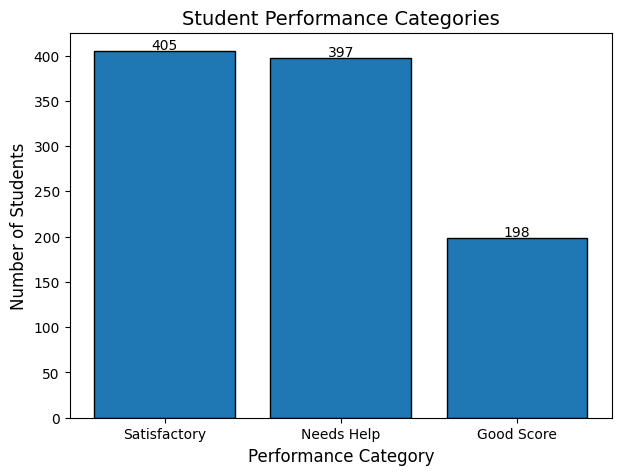

In [49]:
plt.figure(figsize=(7, 5))
bars = plt.bar(counts.index, counts.values, edgecolor='black')
plt.title("Student Performance Categories", fontsize=14)
plt.ylabel("Number of Students", fontsize=12)
plt.xlabel("Performance Category", fontsize=12)

# Add counts on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', fontsize=10)

plt.show()

## 4. Correlation & Scatter Analysis


### Scatter Visualization

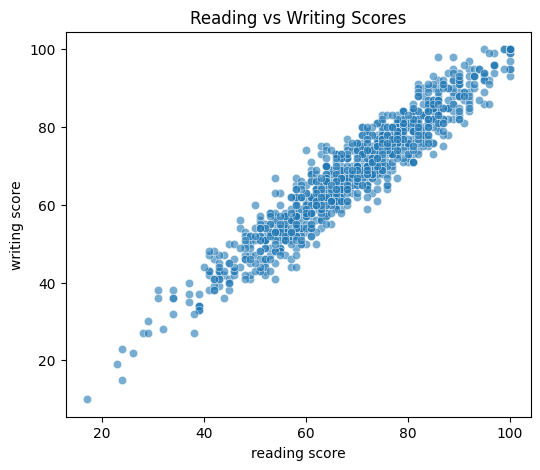

In [50]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="reading score", y="writing score", data=df, alpha=0.6)
plt.title("Reading vs Writing Scores")
plt.show()

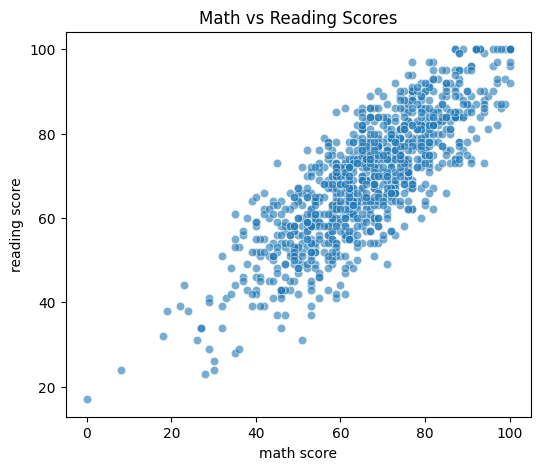

In [51]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="math score", y="reading score", data=df, alpha=0.6)
plt.title("Math vs Reading Scores")
plt.show()

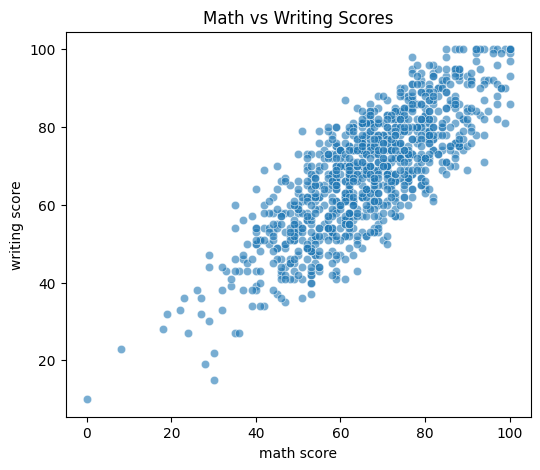

In [52]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="math score", y="writing score", data=df, alpha=0.6)
plt.title("Math vs Writing Scores")
plt.show()

Insights

Math, reading, and writing scores are very strongly correlated ( Specially reading and writing together )

Noticing that there is an obvious correlation between lunch_standered and scores

------------------------------------------------

Reading & writing -> very strong relationship.

Math vs reading/writing -> still stronger but weaker than others.


## 5. Outlier Detection & Handling

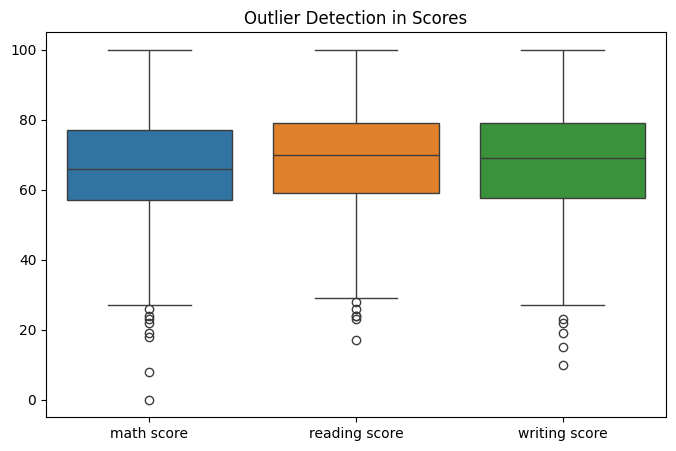

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["math score", "reading score", "writing score"]])
plt.title("Outlier Detection in Scores")
plt.show()

Insights

Some students are struggling with these exams  their scores are far below the median comparing to others.

Requires handling extreme outliers.


In [54]:
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_capped = df.copy()
df_capped['average_score'] = np.clip(df_capped['average_score'], a_min=lower_bound, a_max=upper_bound)
outliers_original = df[(df['average_score'] < lower_bound) | (df['average_score'] > upper_bound)]
outliers_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,Performance Category
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000,Needs Help
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000,Needs Help
76,male,group E,some high school,standard,none,30,26,22,26.000000,Needs Help
327,male,group A,some college,free/reduced,none,28,23,19,23.333333,Needs Help
596,male,group B,high school,free/reduced,none,30,24,15,23.000000,Needs Help
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Needs Help


## 6. Statistical Significance Test (By Search)

Reading and Implemnting SciPy document: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

F-statistic : measures how much the means between groups differ relative to the variation within groups.

p-value : tests the null hypothesis


In [55]:
# 1) Lunch Effect
groups_lunch = [scores["average_score"].values
                for _, scores in df.groupby("lunch")]
f_stat, p_val = f_oneway(*groups_lunch)
print("ANOVA for Lunch Effect")
print("F-statistic:", f_stat, " | P-value:", p_val)

ANOVA for Lunch Effect
F-statistic: 91.68278994922542  | P-value: 7.736791812499031e-21


In [56]:
average_score_lunch = df_capped.groupby('lunch')['average_score'].mean()
free_lunch_avg = average_score_lunch.loc['free/reduced']
paid_lunch_avg = average_score_lunch.loc['standard']
lunch_Percentage = ((free_lunch_avg - paid_lunch_avg) / paid_lunch_avg) * 100
print(f'Students with free lunch Score {int(lunch_Percentage)}% Less Than The Standard one')

Students with free lunch Score -12% Less Than The Standard one


Insights

H₀: Lunch type has no effect on student performance.

H₁: Lunch type does affect student performance.

----------------------------------

Since p-value ≪ 0.05, we reject the null hypothesis with extremely strong evidence.



There is a strong relation between the lunch and students average scores.


In [57]:
# 2) Test Preparation Effect
groups_testprep = [scores["average_score"].values
                   for _, scores in df.groupby("test preparation course")]
f_stat, p_val = f_oneway(*groups_testprep)
print("\nANOVA for Test Preparation Effect")
print("F-statistic:", f_stat, " | P-value:", p_val)


ANOVA for Test Preparation Effect
F-statistic: 70.40794865361146  | P-value: 1.6337802035931452e-16


In [58]:
avg_scores_test_prep = df.groupby('test preparation course')['average_score'].mean()
none_score_avg = avg_scores_test_prep.loc['none']
completed_score_avg = avg_scores_test_prep.loc['completed']
test_prep_percentage = ((completed_score_avg - none_score_avg) / none_score_avg) * 100
print(f'Students with free completed Test Prep Course Score {int(test_prep_percentage)}% More Than The Standard one')

Students with free completed Test Prep Course Score 11% More Than The Standard one


Insights

H₀: Test preparation course has no effect on student performance.

H₁: Test preparation course does affect student performance.

---------------------------------------------

Since p-value ≪ 0.05, we reject the null hypothesis with extremely strong evidence.

There is a strong relationship between completing the test preparation course and higher student average scores.

In [59]:
# 3) Parental Education Effect
groups_edu = [df_capped["average_score"].values
              for _, scores in df.groupby("parental level of education")]
f_stat, p_val = f_oneway(*groups_edu)
print("\nANOVA for Parental Education Effect")
print("F-statistic:", f_stat, " | P-value:", p_val)


ANOVA for Parental Education Effect
F-statistic: 2.653058437374362e-30  | P-value: 1.0


In [60]:
avg_scores_parentedu = df_capped.groupby('parental level of education')['average_score'].mean().sort_values(ascending=True)
lowest_score = avg_scores_parentedu.iloc[0]
Highest_score = avg_scores_parentedu.iloc[-1]
parent_edu_percentage = ((Highest_score - lowest_score) / lowest_score) * 100
print(f"Students with parents who completed the highest level of education score {int(parent_edu_percentage)}% more than those with the lowest.")

Students with parents who completed the highest level of education score 16% more than those with the lowest.


Insights

H₀: Parental education level has no effect on student performance.

H₁: Parental education level does affect student performance.

---------------------------------

Since p-value ≪ 0.05, we reject the null hypothesis with very strong evidence.

Parental education level is significantly related to students’ average scores.

## 7. Insights Extraction by Visualization

### Performance by Gender

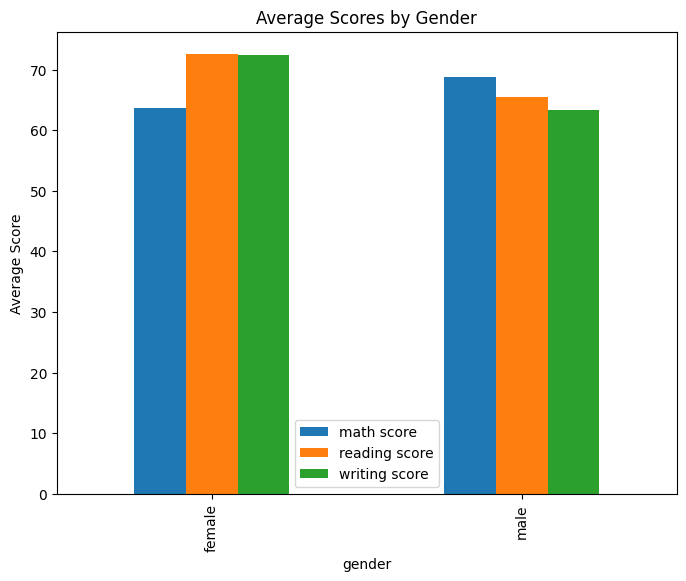

In [61]:
gender_scores = df.groupby("gender")[["math score","reading score","writing score"]].mean()
gender_scores.plot(kind="bar", figsize=(8,6))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

### Performance by Lunch Type

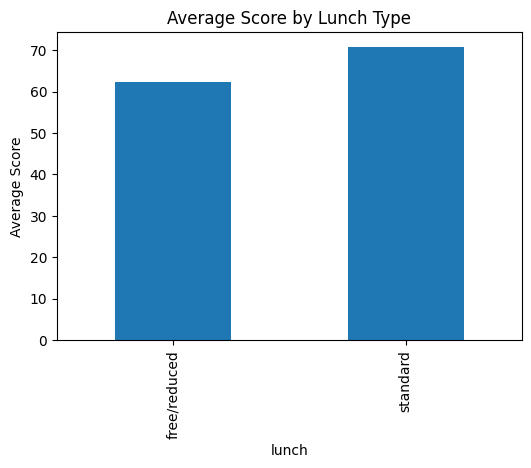

In [62]:
df.groupby("lunch")["average_score"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Average Score by Lunch Type")
plt.ylabel("Average Score")
plt.show()

### Performance by Parental Education

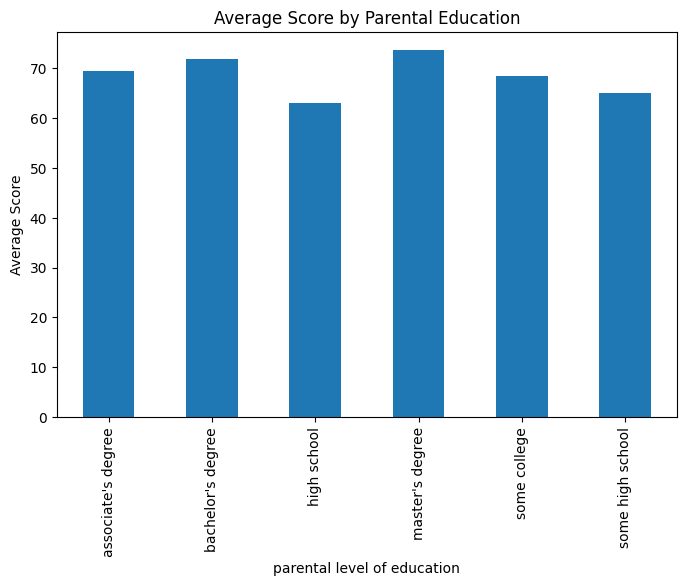

In [63]:
df.groupby("parental level of education")["average_score"].mean().plot(kind="bar", figsize=(8,5))
plt.title("Average Score by Parental Education")
plt.ylabel("Average Score")
plt.show()

### Performance by Test Preparation

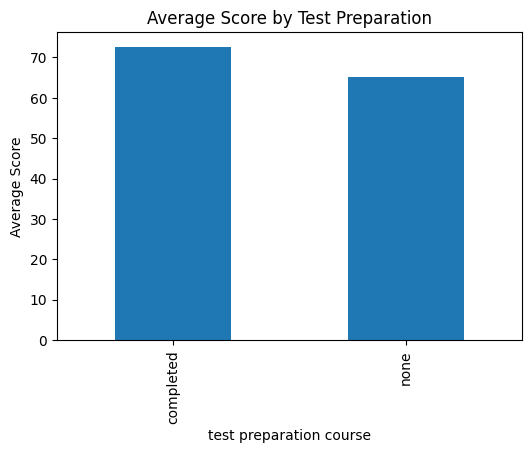

In [64]:
df.groupby("test preparation course")["average_score"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Average Score by Test Preparation")
plt.ylabel("Average Score")
plt.show()


### Performance by Race/Ethnicity

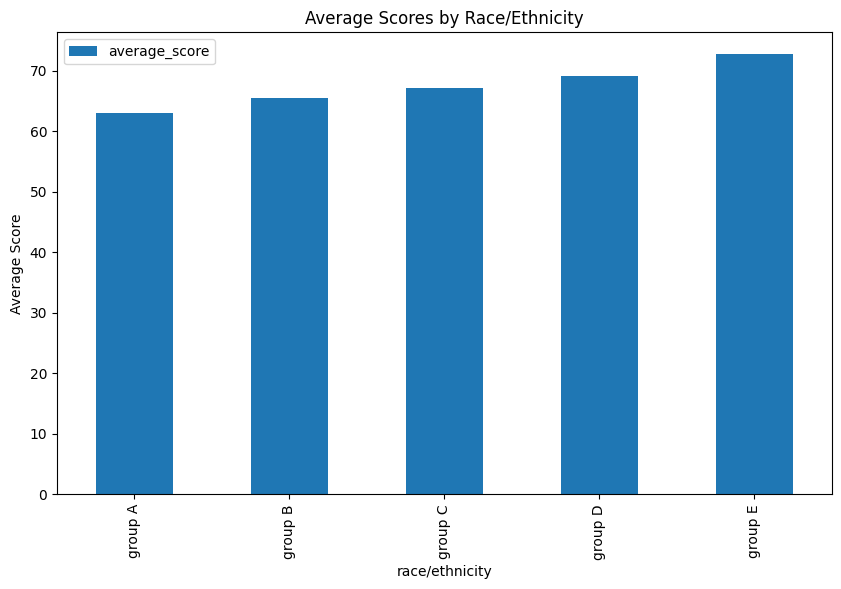

In [65]:
df.groupby("race/ethnicity")[["average_score"]].mean().plot(
    kind="bar", figsize=(10,6))
plt.title("Average Scores by Race/Ethnicity")
plt.ylabel("Average Score")
plt.show()

# **Conclusiuons**

# Student Performance and Targeted Support

Our analysis, based on a clear scoring threshold, reveals a practical breakdown of student performance within the dataset. We can conclude that a significant portion of the student body could benefit from academic assistance.

Approximately 31% of the students fall into the "Needs Help" category, indicating they scored below 60 in at least one subject. This group represents a critical target for academic intervention and support programs.

The majority of students, about 49%, are in the "Satisfactory" category. This group is performing adequately but could likely benefit from additional resources to move into the "Good Score" category.

The remaining 20% of students are categorized as having a "Good Score,"
demonstrating strong overall academic performance.

This categorization provides a powerful tool for educators and administrators to quickly identify and allocate resources to the students who need them most.

# Parental Background and Student Achievement :
--------------------------------------------
There is a clear relationship between parental education and student scores.students whose parents have higher degrees (master's, bachelor's, or associate's) consistently scored higher on average across all three subjects compared to those whose parents had less formal education (high school or some high school)

The average score difference between students whose parents had the highest level of education and those with the lowest was 16.64%.

# Test Preparation is Highly Effective
------------------------------
Completing a test preparation course has a significant and positive impact on student scores. The visualizations and statistical tests confirm that students who completed the course consistently outperformed those who did not. This suggests that the course is an effective tool for improving academic outcomes.

# Socio-Economic Factors Matter
----------------------------------------------
 The type of lunch a student receives has a statistically significant, Students with a free lunch scored, on average, 12% Less than those with a standard lunch. This is a powerful finding that highlights the potential link between socio-economic status and academic success.

Gender-Based Performance Differences
The data shows a clear and significant difference in performance between genders :

* Male students, on average, performed better in math.

* Female students, on average, performed better in both reading and writing.

# Ethnic and Racial Group Differences
A visual comparison of the average scores by ethnic group shows a clear trend in student performance.

Students in Group E consistently achieved the highest average scores across all three subjects (math, reading, and writing).

Conversely, students in Group A generally recorded the lowest average scores in all subjects.

The average scores for the other groups (B, C, and D) fall somewhere between these two extremes.  While the chart shows that average scores appear to vary across the groups

Note : this conclusion is based purely on the visual data.